In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [2]:
# Read in the example catalog 
catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/Yihe/COOPER/COOPER2012/Cooper2012 v2.csv')


In [3]:
print(len(catalog["Lat"]))

20735


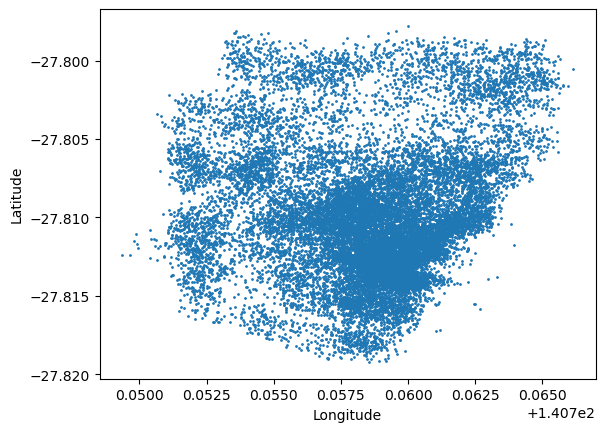

In [4]:
plt.scatter(catalog["Lon"],catalog["Lat"], s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

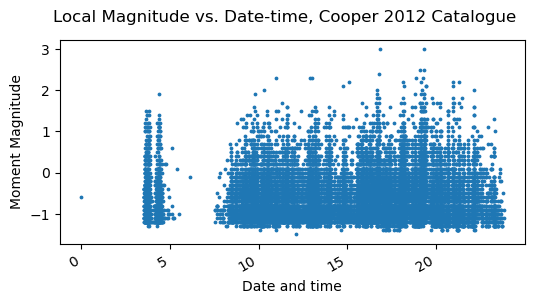

In [5]:


figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(catalog["TimeN"],catalog["ML"],s=3)
figure.suptitle("Local Magnitude vs. Date-time, Cooper 2012 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

In [6]:
# Inj End 20.02635
# Inj Start 2.875574537

injSt = 2.875574537
injEnd = 20.02635 - injSt
print(injEnd)

dt = np.array(catalog['TimeN'].copy()) - injSt
#print(dt)
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, lonf, latf, elef,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['Lon'], catalog['Lat'], catalog['Elevation'])
    if 0 <= d <= injEnd
])
print(len(magF),len(dt))

17.150775463000002
18147 20735


In [7]:
lonref = statistics.median(lonf[0:10])
latref = statistics.median(latf[0:10])
eleref = statistics.median(elef[0:10])
print(lonref,latref,eleref)

140.75907403705 -27.811975735 -4.1790875199999995


In [8]:
dist = np.sqrt(((np.array(latf)-latref)*111.1)**2+((np.array(lonf)-lonref)*111.32*np.cos(np.array(latf)))**2+(np.array(elef)-eleref)**2)

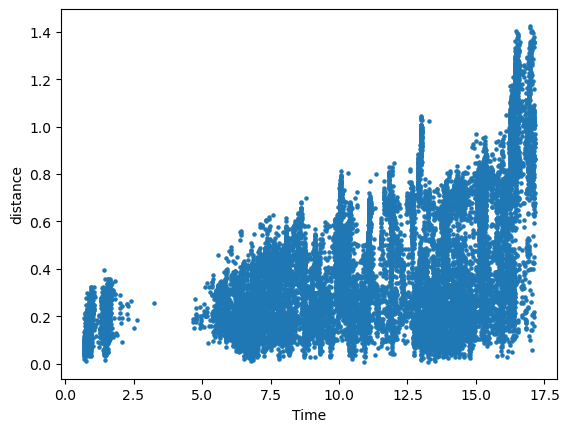

In [9]:
plt.scatter(dtF,dist,s=5)
plt.xlabel("Time")
plt.ylabel("distance")
plt.show()

In [10]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

In [11]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [12]:
quicksort_with_swaps(dstc,dstRef , 0, len(dstc) - 1)

In [18]:
rDivs=[[] for i in range(5)]
rDmaxRad=[]
count=0
rpl=0
for i in range(len(dstc)):
    if count <5000:
        #print("here")
        rDivs[rpl].append(dstRef[i])
        count +=1
    if count ==5000:
        count = 0
        rpl+=1
        rDmaxRad.append(dstc[i])
rDmaxRad.append(dstc[i])

In [13]:
print(rDmaxRad)

[0.20245378076449985, 0.36479449443682577, 0.6471343472984517, 1.3289561966232089, 1.6360829821383296]


In [13]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [14]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

# Example usage:
my_array = [3, 6, 8, 10, 1, 2, 1]
sorted_array = quicksort(my_array)
print(sorted_array)

[1, 1, 2, 3, 6, 8, 10]


In [16]:
sDivs=[[] for i in range(5)]
for i in range(5):
    sDivs[i]=quicksort(rDivs[i])

In [17]:
# Create a time series to calculate for b-value through time. To start with, use 300 events for b-val calculation
bValT =[]
tStamp =[]
bpValT=[]
mcCol=[]
low_b_list= []
high_b_list= []
std_list = []

low_bp_list=[]
high_bp_list=[]
stdp_list=[]

magMax=[]
magD=[]

tester= True
inc = 300

while inc <=len(catalog["Mw"]):
    magt=[]
    mx=-10
    md=0
    
    for y in range(inc-300,inc):
        magt.append(catalog["Mw"][y])
        if magt[len(magt)-1]>=mx:
            mx=magt[len(magt)-1]
            md=catalog["Time"][y]           
    magMax.append(mx)
    magD.append(md)
    magT = np.array(magt)
    b, Mc, hist = b_value_functions.btrad(magT, bins, delta_b = 0.1)
    bValT.append(b)
    mcCol.append(Mc)
    hist1, bP = b_value_functions.bpos(magT)
    bpValT.append(bP)
    #date time conversion
    
    
    tStamp.append(catalog["Time"][inc])
    
    low_b, high_b, std = b_value_functions.bootstrap(magT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)
    low_b_list.append(low_b)
    high_b_list.append(high_b)
    std_list.append(std)
    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(magT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    low_bp_list.append(low_bp)
    high_bp_list.append(high_bp)
    stdp_list.append(stdp)
    inc=inc+30

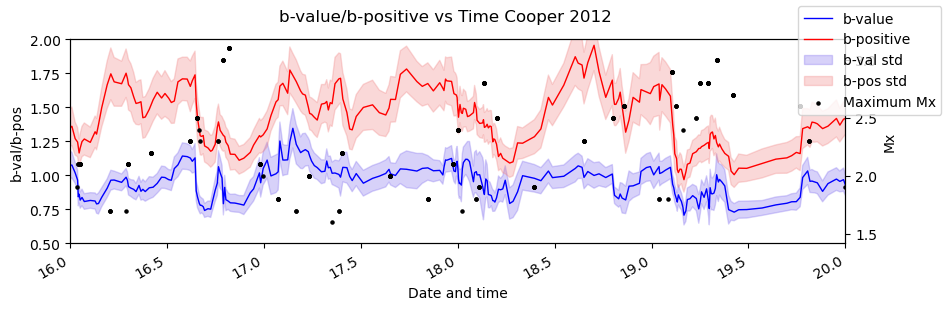

In [18]:
# November into December
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=1,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.scatter(magD,magMax,s=5,label='Maximum Mx',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time Cooper 2012")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('Mx')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.5,2])
ax1.set_xlim([16,20])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

In [29]:
hyd1 = pd.read_csv("D:\Yihe\Yihe\COOPER\COOPER2012\Cooper 2012 Hydraulics.csv")
hyd2 = pd.read_csv("D:\Yihe\Yihe\COOPER\COOPER2012\Cooper 2012 Hyd 2.csv")

hydT=pd.concat([hyd1["time"],hyd2["time"]])

hydI = pd.concat([hyd1["Inj"],hyd2["Inj"]])
hydP = pd.concat([hyd1["Press"],hyd2["Press"]])

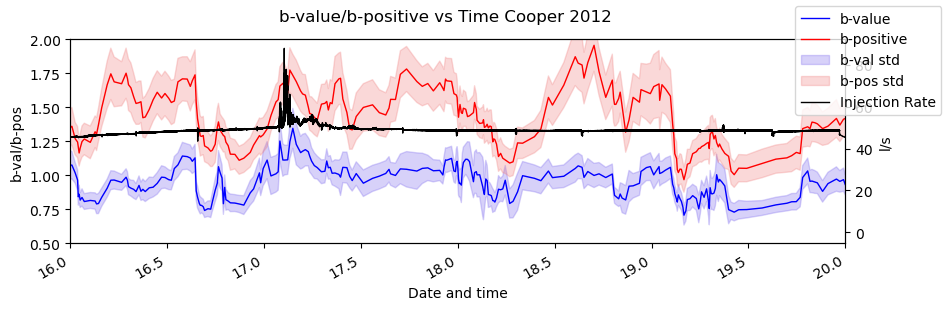

In [57]:
# November into December
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()


ax1.plot(tStamp,bValT,linewidth=1,label='b-value',color="blue")
ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.plot(hydT,hydP,linewidth=1,label='Injection Rate',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time Cooper 2012")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('l/s')
#ax2.set_ylim([-1.5,3.2])
ax1.set_ylim([0.5,2])
ax1.set_xlim([16,20])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

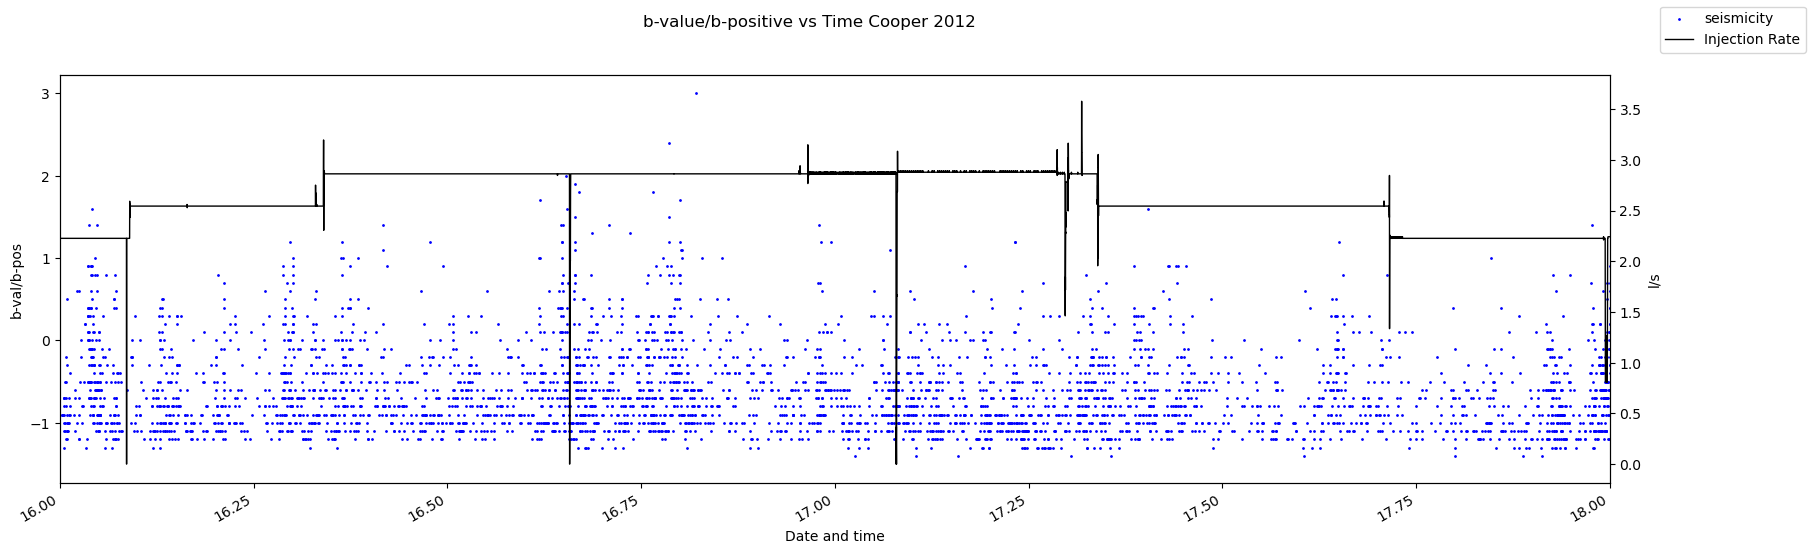

In [21]:
# November into December
fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()


ax1.scatter(catalog["Time"],catalog["ML"],s=1,label='seismicity',color="blue")
#ax1.plot(tStamp,bpValT,linewidth=1,label='b-positive',color='red')
#ax1.fill_between(tStamp, low_b_list, high_b_list, label = '95% CI b-val', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, low_bp_list, high_bp_list, label = '95% CI b-val', alpha = 0.3, color = 'lightcoral')
#ax1.fill_between(tStamp, np.subtract(bValT,std_list), np.add(bValT, std_list), label = 'b-val std', alpha = 0.3, color = 'mediumslateblue')
#ax1.fill_between(tStamp, np.subtract(bpValT,stdp_list), np.add(bpValT,stdp_list), label = 'b-pos std', alpha = 0.3, color = 'lightcoral')
ax2.plot(hydT,hydI,linewidth=1,label='Injection Rate',color='k')

#ax2.scatter(tStamp1,mcCol,s=5,label="Mc",color='green')
fig.suptitle("b-value/b-positive vs Time Cooper 2012")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("b-val/b-pos")
ax2.set_ylabel('l/s')
#ax2.set_ylim([-1.5,3.2])
#ax1.set_ylim([0.5,2])
ax1.set_xlim([16,18])
fig.autofmt_xdate()
fig.legend(loc="upper right")
#plt. axhline(y=1.96, color='r', linestyle='-') 
plt.show()

In [22]:
tmax = max(catalog["ML"])
tin=[]
for i in range(len(catalog["ML"])-1):
    if catalog["ML"][i]==tmax:
        tin.append(i)
print(catalog["Time"][tin[0]])


16.82050926


In [16]:
 import math


def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

def round_decimals_up(number:float, decimals:int=2):
    """
    Returns a value rounded up to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor

In [52]:
br=[[] for i in range(5)]
bpr=[[] for i in range(5)]
dtr=[[] for i in range(5)]
lbr=[[] for i in range(5)]
hbr=[[] for i in range(5)]
stdr=[[] for i in range(5)]
lbpr=[[] for i in range(5)]
hbpr=[[] for i in range(5)]
stdpr=[[] for i in range(5)]
mxmr=[[] for i in range(5)]
mxdr=[[] for i in range(5)]

for i in range(5):
    print(i)
    for x in range(300,len(sDivs[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(catalog["ML"][sDivs[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=catalog["Time"][sDivs[i][j]]
        mxT=np.array(mxt)
        mxmr[i].append(mxm)
        mxdr[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br[i].append(b)
        dtr[i].append(catalog["Time"][sDivs[i][x]])
        bpr[i].append(bP)
        lbr[i].append(low_b)
        lbpr[i].append(low_bp)
        hbr[i].append(high_b)
        hbpr[i].append(high_bp)
        stdr[i].append(std)
        stdpr[i].append(stdp)

0
1
2
3
4


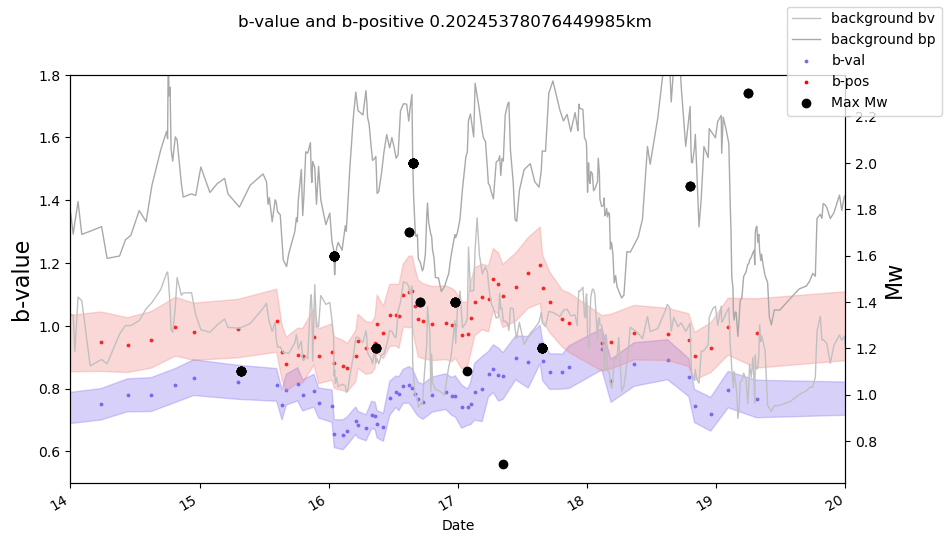

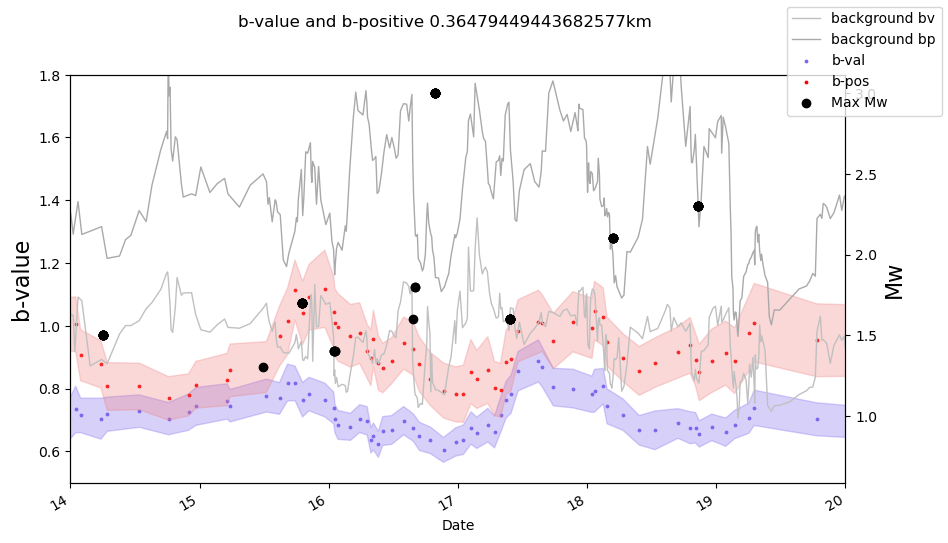

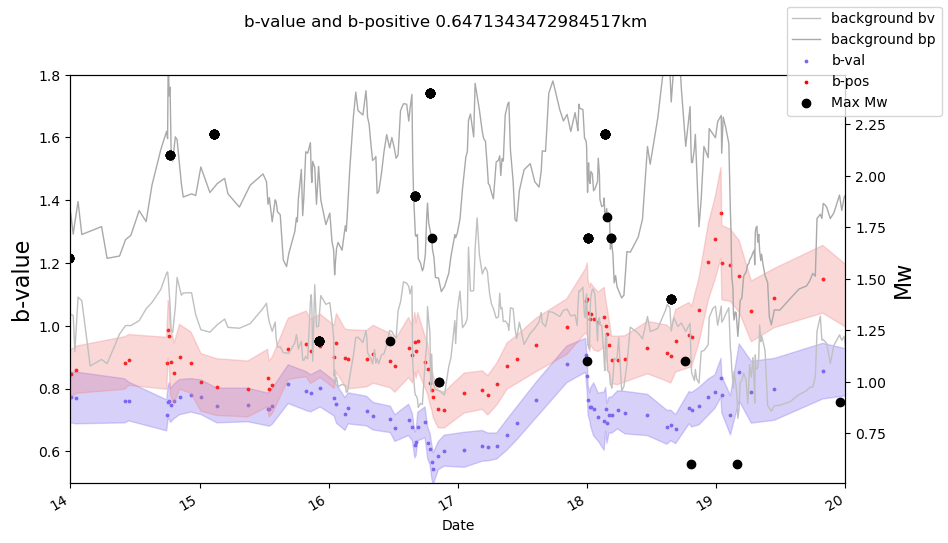

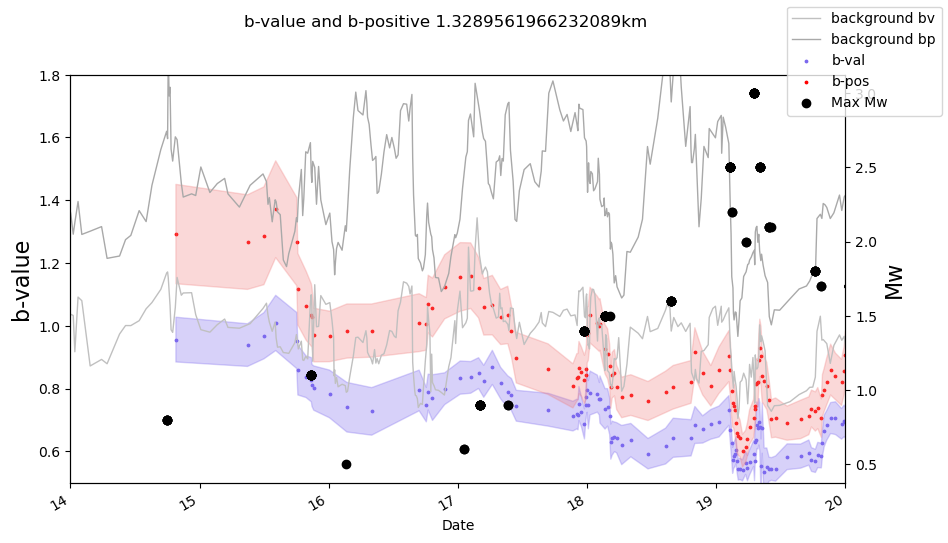

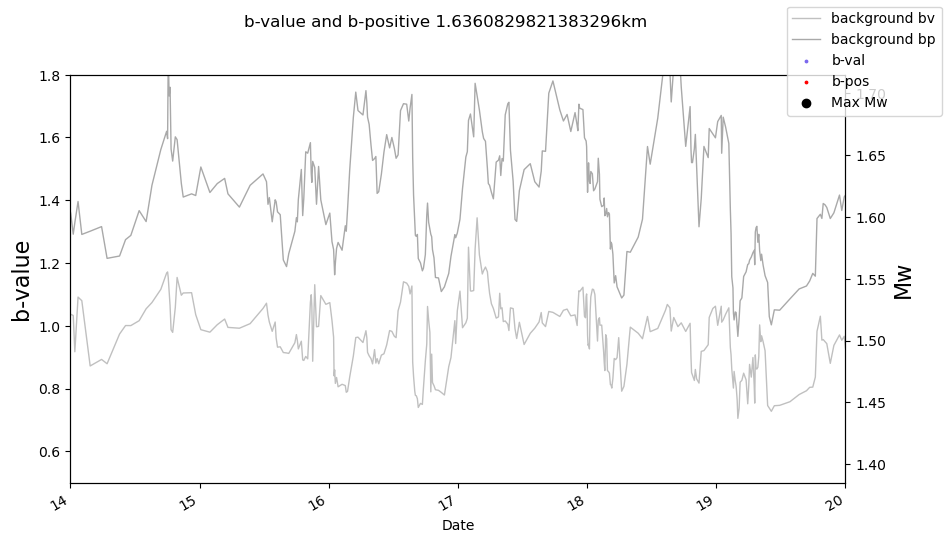

In [59]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(10,6))
    ax2 = ax.twinx()

    fig.suptitle("b-value and b-positive " + str(rDmaxRad[i]) + "km")
    #first plot
    #ax = fig.add_subplot(gs[0])
    ax.plot(tStamp,bValT,linewidth=1,label='background bv', color ="silver")
    ax.plot(tStamp,bpValT,linewidth=1,label='background bp', color ="darkgray")
    ax.scatter(dtr[i], br[i], label = 'b-val', color = 'mediumslateblue',s=3)
    ax.fill_between(dtr[i], np.subtract(br[i],stdr[i]), np.add(br[i],stdr[i]), alpha = 0.3, color = 'mediumslateblue')


    ax.scatter(dtr[i], bpr[i],label = 'b-pos', color = 'red',s=3)
    ax.fill_between(dtr[i], np.subtract(bpr[i],stdpr[i]), np.add(bpr[i],stdpr[i]), alpha = 0.3, color = 'lightcoral')
    ax2.scatter(mxdr[i],mxmr[i],label="Max Mw",color='black')
    ax2.set_ylabel('Mw',size=16)

    ax.set_ylim([0.5,1.8])
    ax.set_xlim([14,20])
    ax.set_ylabel(r'b-value', size =16)
    ax.set_xlabel('Date')
    fig.autofmt_xdate()
    fig.legend(loc = 'upper right')
    plt.plot()
    #plt.savefig("bp bv "+str(int(rDmaxRad[i]))+" Cooper 2003.png")

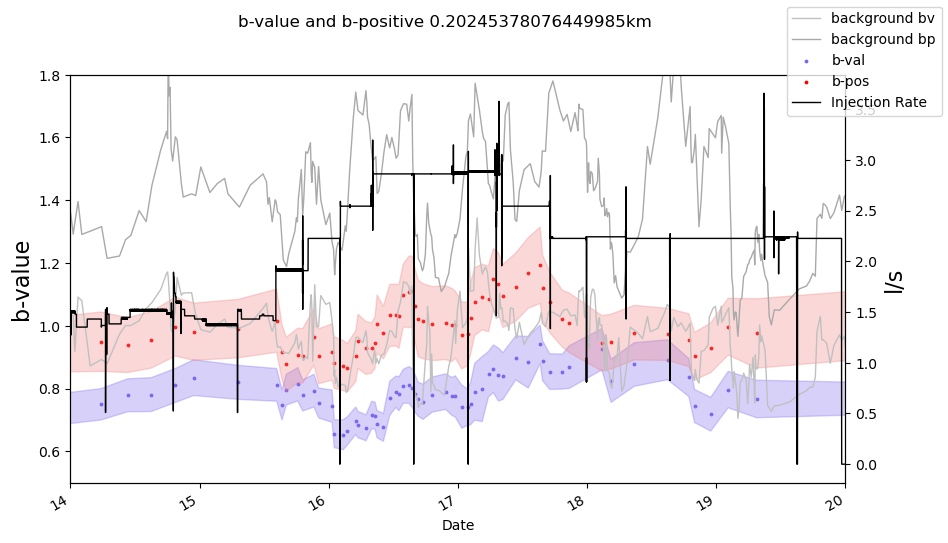

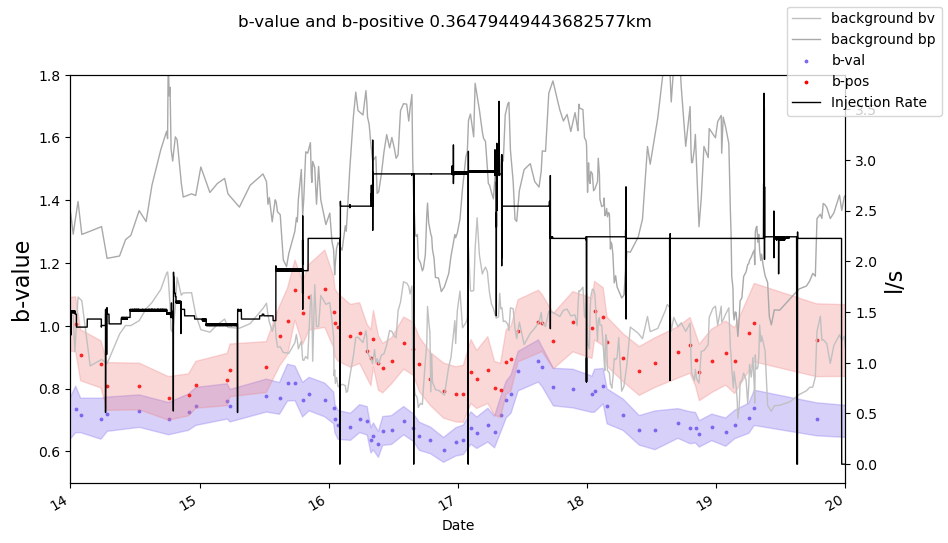

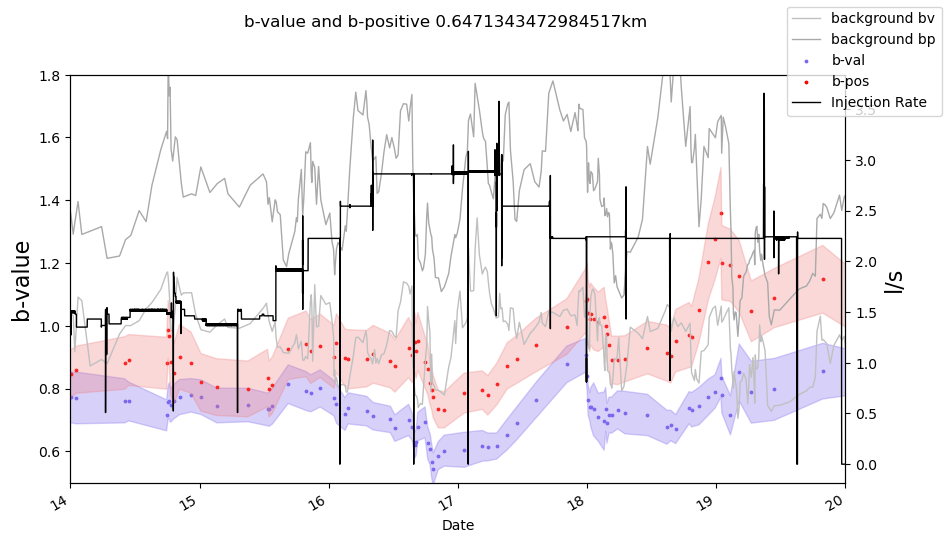

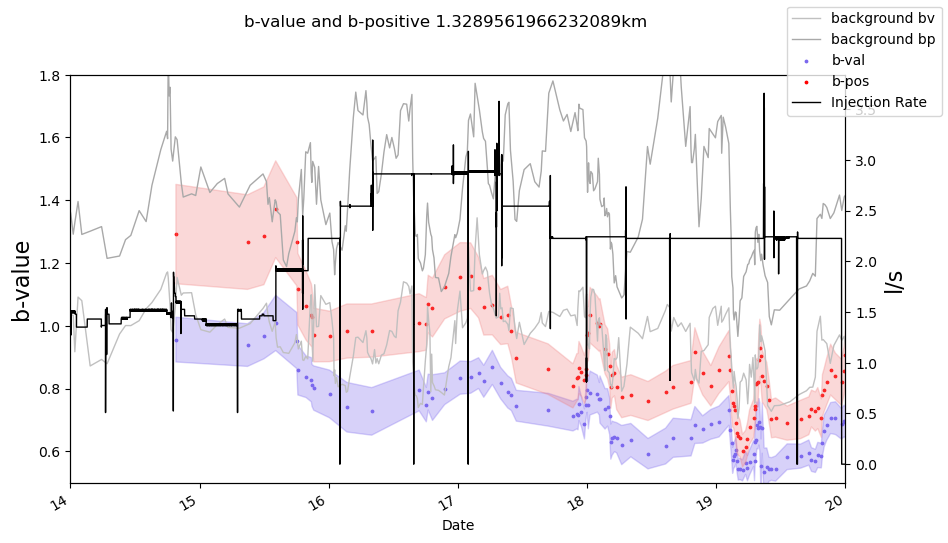

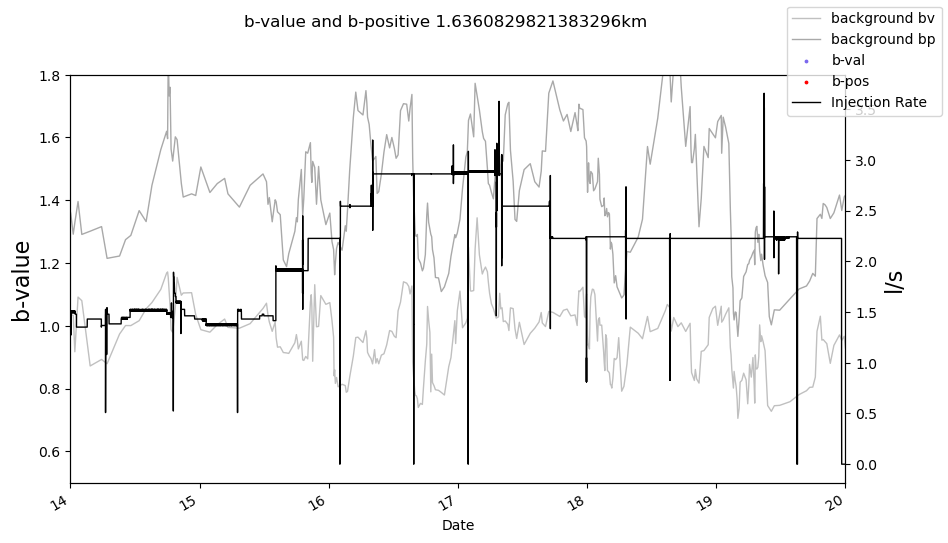

In [54]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(10,6))
    ax2 = ax.twinx()

    fig.suptitle("b-value and b-positive " + str(rDmaxRad[i]) + "km")
    #first plot
    #ax = fig.add_subplot(gs[0])
    ax.plot(tStamp,bValT,linewidth=1,label='background bv', color ="silver")
    ax.plot(tStamp,bpValT,linewidth=1,label='background bp', color ="darkgray")
    ax.scatter(dtr[i], br[i], label = 'b-val', color = 'mediumslateblue',s=3)
    ax.fill_between(dtr[i], np.subtract(br[i],stdr[i]), np.add(br[i],stdr[i]), alpha = 0.3, color = 'mediumslateblue')


    ax.scatter(dtr[i], bpr[i],label = 'b-pos', color = 'red',s=3)
    ax.fill_between(dtr[i], np.subtract(bpr[i],stdpr[i]), np.add(bpr[i],stdpr[i]), alpha = 0.3, color = 'lightcoral')
    ax2.plot(hydT,hydI,linewidth=1,label='Injection Rate',color='k')
    ax2.set_ylabel('l/s',size=16)

    ax.set_ylim([0.5,1.8])
    ax.set_xlim([14,20])
    ax.set_ylabel(r'b-value', size =16)
    ax.set_xlabel('Date')
    fig.autofmt_xdate()
    fig.legend(loc = 'upper right')
    plt.plot()
    #plt.savefig("bp bv "+str(int(rDmaxRad[i]))+" Cooper 2003.png")

[]

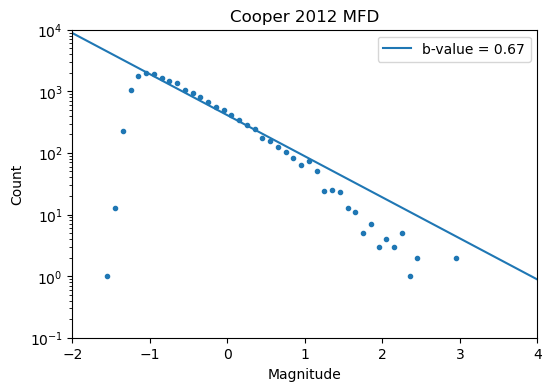

In [15]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(np.array(magF), bins, delta_b = 0.1)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Cooper 2012 MFD')
plt.plot()

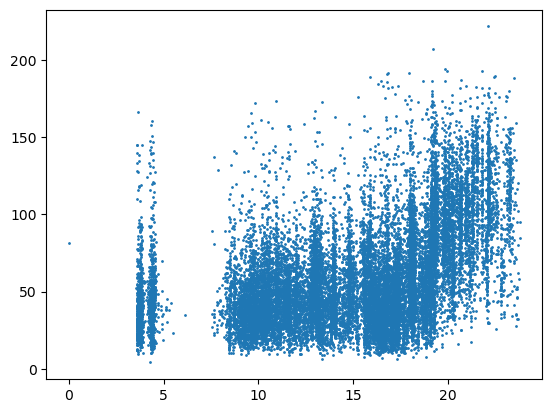

In [17]:
rErr = np.sqrt(np.square(catalog["X-relErr"])+np.square(catalog["Y-relErr"])+np.square(catalog["Z-relErr"]))

plt.scatter(catalog["Time"],rErr,s=1)
plt.show()

In [18]:
print(statistics.mean(rErr),statistics.median(rErr),max(rErr))

58.73561457376745 50.950956811427986 221.63483480716653


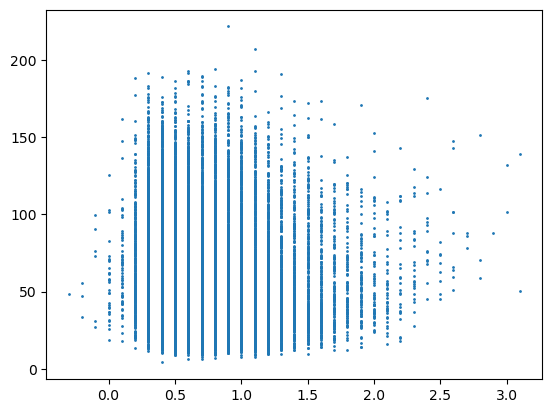

In [19]:
plt.scatter(catalog["Mw"],rErr,s=1)
plt.show()

In [16]:
#make copy of distance array and an array referencing distance copy
dstc2 = dist.copy()
dstRef2=[]
for i in range(len(dstc2)):
    dstRef2.append(i)

In [17]:
print(len(dstc2))
print(len(dstRef2))

18147
18147


In [18]:
# sort distance array and sort reference array along with
quicksort_with_swaps(dstc2,dstRef2 , 0, len(dstc2) - 1)

In [19]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc2)):
    if count <9074:
        rDivs2[rpl].append(dstRef2[i])
        count +=1
    if count ==9074:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc2[i])

In [20]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])

In [21]:
rDmaxRad2.append(dstc2[len(dstc2)-1])
print(rDmaxRad2)

[np.float64(0.331105509205493), np.float64(1.4246285701508947)]


In [22]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(np.array(magF)[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.1)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.1)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)
        

0
1


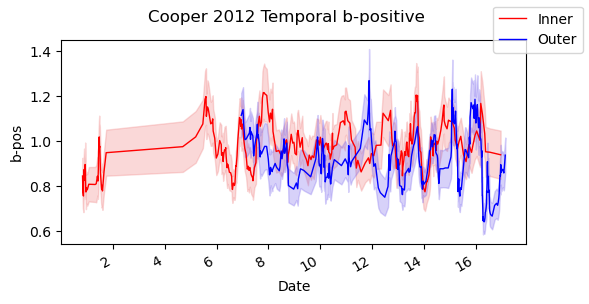

In [23]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Cooper 2012 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([8,24])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

20.02635


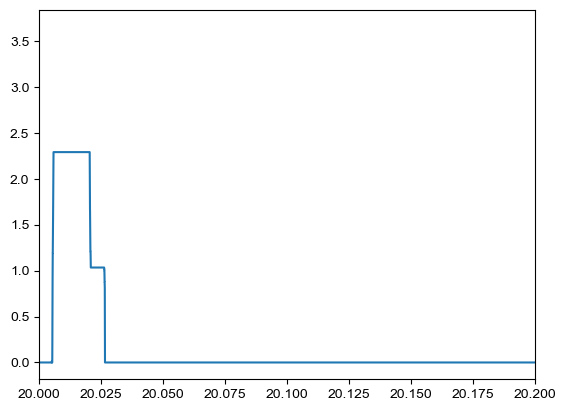

In [39]:
# ax2.plot(hydT,hydP,linewidth=1,label='Injection Rate',color='k')
plt.plot(hydT,hydI)
plt.xlim(20,20.2)
hyTA = hydT.to_numpy()
hyIA = hydI.to_numpy()
# first drop below 1 after 20.02
injEnd = 0
truther = True
ct=0
while truther:
    #print(hyDT[ct])
    if hyTA[ct]>20.02:
        if hyIA[ct]<1:
            injEnd = hyTA[ct]
            truther = False
    ct+=1
print(injEnd)

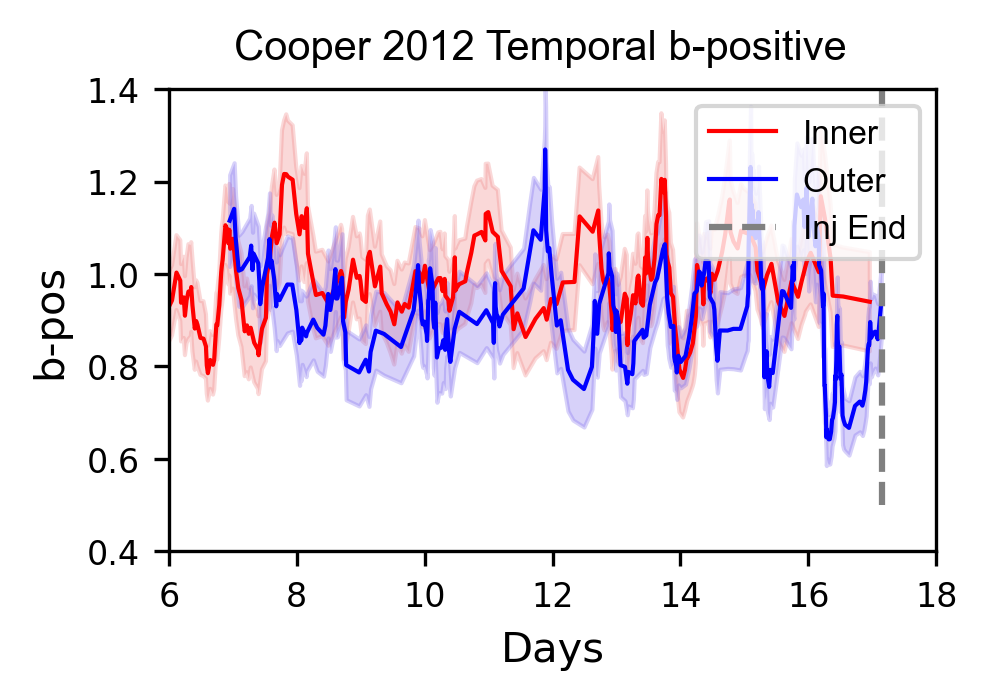

In [24]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2012 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.5,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([6,18])
ax1.set_ylim([0.4,1.4])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(6, 18, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\cooper2012.png",bbox_inches='tight', pad_inches=0.05)

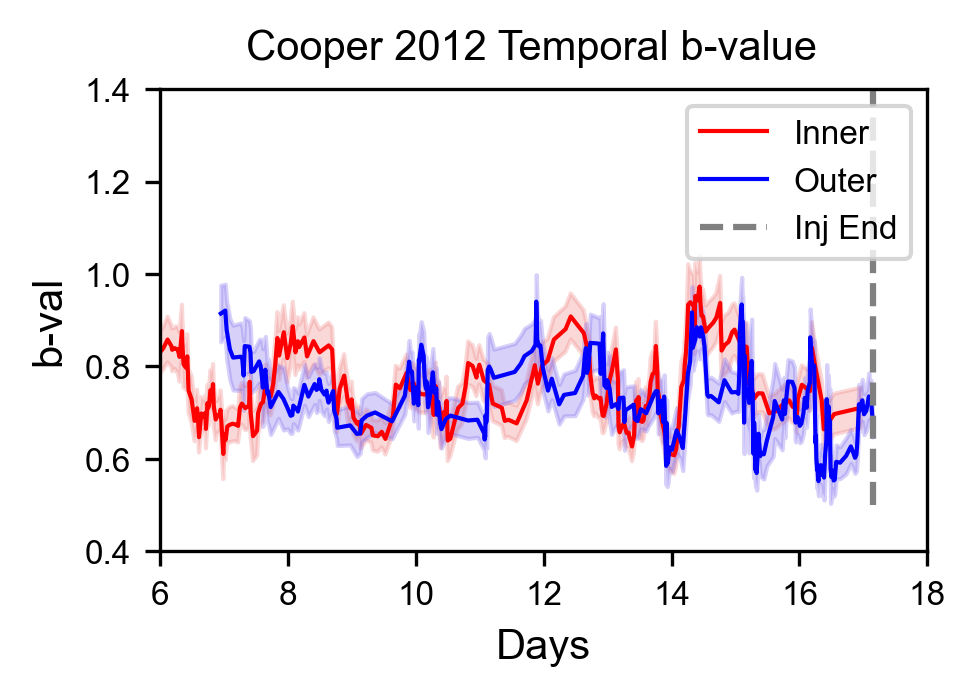

In [25]:
### Same but b-val
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2012 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.5,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([6,18])
ax1.set_ylim([0.4,1.4])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(6, 18, 7))
ax1.set_ylabel('b-val',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

plt.legend(loc = 'upper right',fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\cooper2012.png",bbox_inches='tight', pad_inches=0.05)

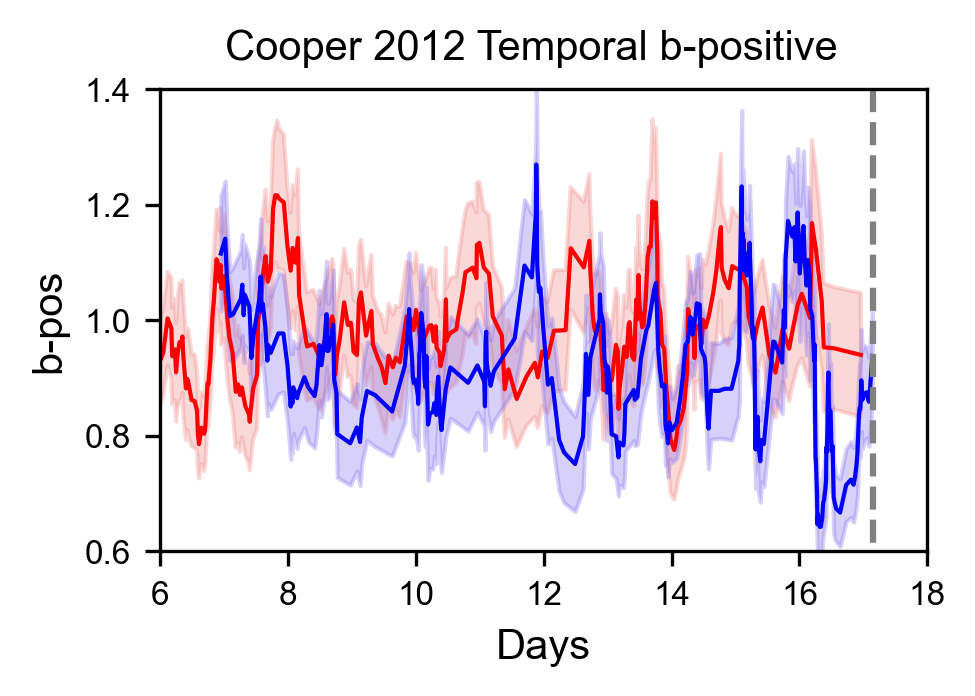

In [26]:
fig, ax1 = plt.subplots(figsize=(3.3,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2012 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.5,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([6,18])
ax1.set_ylim([0.6,1.4])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xticks(np.linspace(6, 18, 7))
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)

#plt.legend(loc = 'upper right',fontsize=8)
plt.show()
fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\cooper2012 sansLgnd.png",bbox_inches='tight', pad_inches=0.05)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9] 996


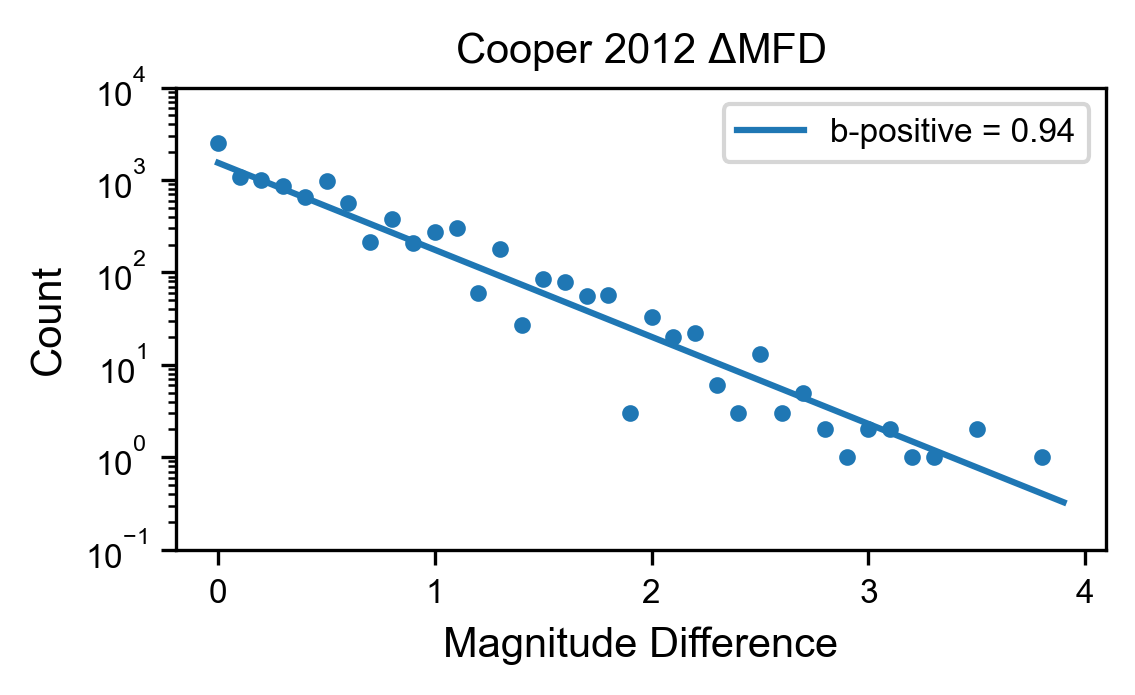

In [41]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(magF)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Cooper 2012 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Cooper2012 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [27]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if np.array(magF)[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=np.array(magF)[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if np.array(magF)[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=np.array(magF)[sDivs2[1][i]]

print(ioMax)

[np.float64(3.0), np.float64(3.0)]


In [28]:
print(rDmaxRad2[0]/rDmaxRad2[1])

0.23241532294303402


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9] 996


[]

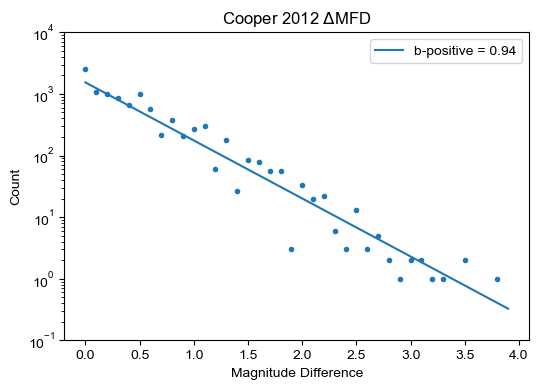

In [29]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(magF)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude Difference')
ax1.set_ylabel('Count')
ax1.set_title('Cooper 2012 $\Delta$MFD')
plt.plot()

[]

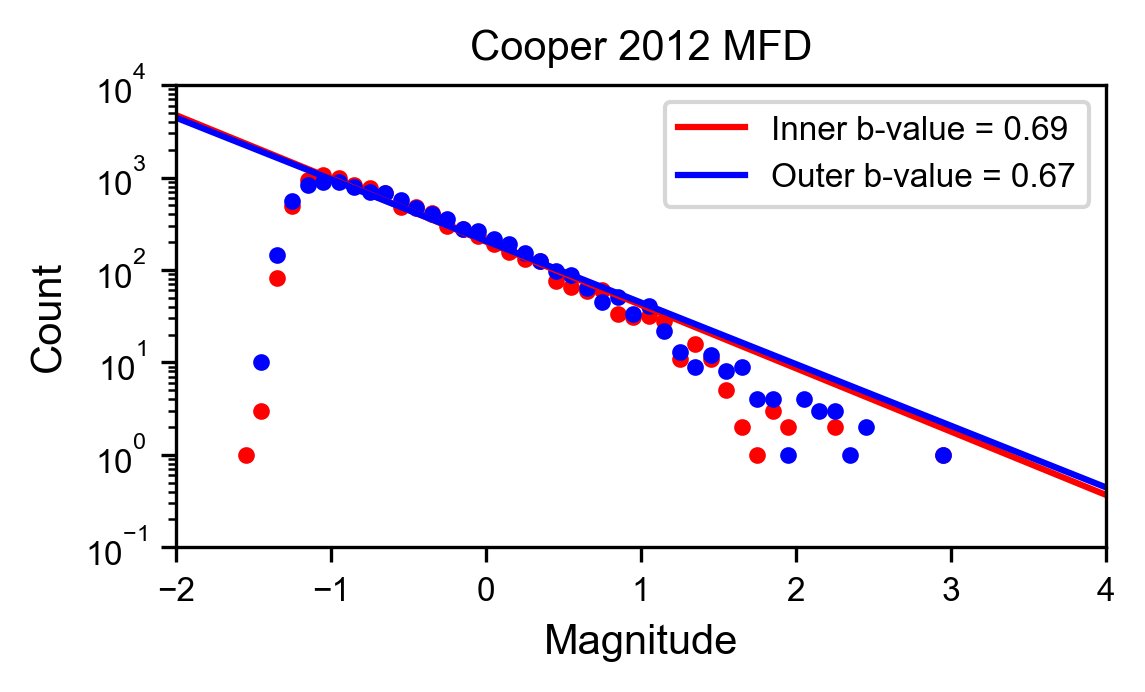

In [35]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(np.array(magF)[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(np.array(magF)[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.1)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.1)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi[0], marker = '.',color='r')
ax1.plot(x, best_fiti, label = 'Inner b-value = '+str(np.round(bi,2)),color='r')

ax1.scatter(mid_bins, histo[0], marker = '.',color='b')
ax1.plot(x, best_fito, label = 'Outer b-value = '+str(np.round(bo,2)),color='b')

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#ax1.set_xticks(np.linspace(6, 18, 7))


ax1.set_xlabel('Magnitude',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Cooper 2012 MFD',fontsize=10)
plt.plot()
fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\cooper2012 sansLgnd.png",bbox_inches='tight', pad_inches=0.05)

0.9626766232789234 0.9028184873000715


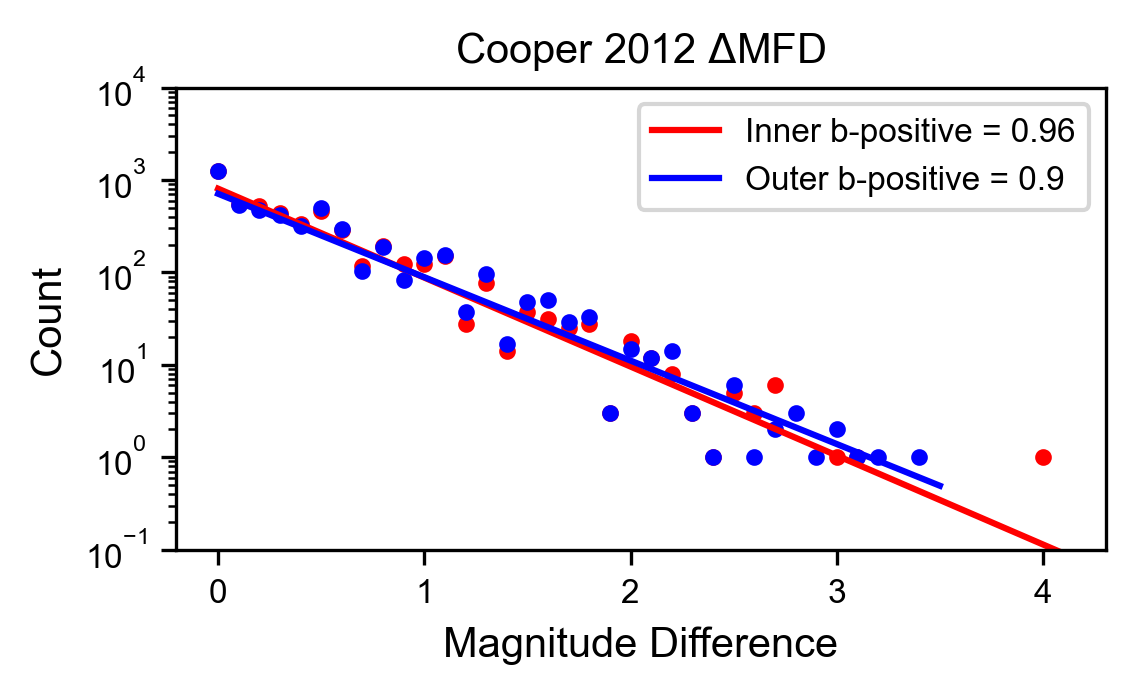

In [40]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(magF[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(magF[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Cooper 2012 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Cooper2012 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

In [42]:
mmdi=[]
mmmi=[]
for x in range(len(sDivs2[0])):
    mmdi.append(catalog["Time"][sDivs2[0][x]])
    mmmi.append(catalog["ML"][sDivs2[0][x]])
    
mmdo=[]
mmmo=[]
for x in range(len(sDivs2[1])):
    mmdo.append(catalog["Time"][sDivs2[1][x]])
    mmmo.append(catalog["ML"][sDivs2[1][x]])

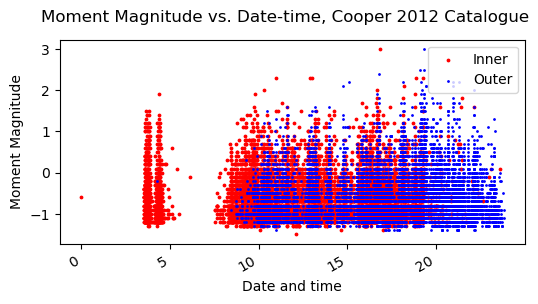

In [44]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(mmdi,mmmi,s=3,color='r',label='Inner')
ax1.scatter(mmdo,mmmo,s=1,color='b',label='Outer')
figure.suptitle("Moment Magnitude vs. Date-time, Cooper 2012 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
ax1.legend(loc = 'upper right')
figure.autofmt_xdate()
plt.show()